<a href="https://colab.research.google.com/github/advaith017/FruitsDetection/blob/main/FruitsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from PIL import Image
from glob import glob
from google.colab import drive

In [2]:
! pip install --upgrade --force-reinstall --no-deps kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 6.6 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=c55cb8cd28177cd7a1713f8c07f18ecd87a00075284121e7839265036883f934
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [4]:
# from google.colab import files
# files.upload()

In [5]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download -d moltean/fruits

 99% 1.27G/1.28G [00:44<00:00, 53.3MB/s]
100% 1.28G/1.28G [00:44<00:00, 31.2MB/s]


In [8]:
%%capture
! unzip fruits.zip -d dataset

In [9]:
#Printing all file names under the input directory
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Kaggle/fruits-360_dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

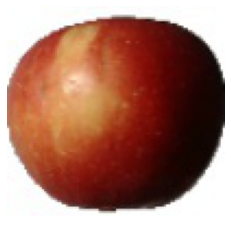

(100, 100, 3)


In [10]:
#Setting Training & Test dir paths
train_path = '/content/dataset/fruits-360_dataset/fruits-360/Training'
test_path = '/content/dataset/fruits-360_dataset/fruits-360/Test'
#Displaying the image/content/dataset/fruits-360_dataset/fruits-360/Training/Apple Braeburn/0_100.jpg
img = load_img(train_path + "/Apple Braeburn/0_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Printing the shape of the image array 
x = img_to_array(img)
print(x.shape)
#/content/drive/MyDrive/Kaggle/fruits-360-original-size/fruits-360-original-size/Training/apple_braeburn

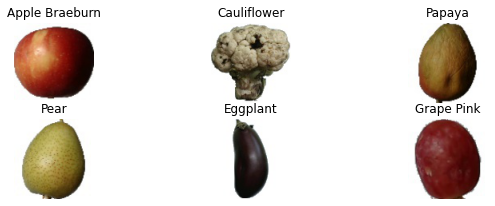

In [11]:
#Visualizing more Images
images = ['Apple Braeburn', 'Cauliflower', 'Papaya', 'Pear', 'Eggplant', 'Grape Pink']
fig = plt.figure(figsize =(10,5))
for i in range(len(images)):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path + "/" + images[i] +"/0_100.jpg", target_size=(100,100)))

In [12]:
#Finding number of classes
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

131


In [13]:
#Creating the model
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class)) 
model.add(Activation("softmax"))

#Compiling the model
model.compile(loss = "categorical_crossentropy",
optimizer = "rmsprop",
metrics = ["accuracy"])

#Getting model's summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                    

In [14]:
#Specifing epochs & batch size
epochs = 100
batch_size = 64

In [15]:
#Creating an object of ImageDataGenerator.
train_datagen = ImageDataGenerator(rescale= 1./255,
shear_range = 0.3,
horizontal_flip=True,
zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale= 1./255)
#Generating batches of Augmented data.
train_generator = train_datagen.flow_from_directory(
directory = train_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")
test_generator = test_datagen.flow_from_directory(
directory = test_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [16]:
#Fitting the model
hist = model.fit_generator(
generator = train_generator,
steps_per_epoch = 1600 // batch_size,
epochs=epochs,
validation_data = test_generator,
validation_steps = 800 // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/100
25/25 [==============================] - 18s 199ms/step - loss: 4.7372 - accuracy: 0.0288 - val_loss: 4.2890 - val_accuracy: 0.0690
Epoch 2/100
25/25 [==============================] - 5s 208ms/step - loss: 4.0037 - accuracy: 0.0899 - val_loss: 3.4145 - val_accuracy: 0.2227
Epoch 3/100
25/25 [==============================] - 5s 196ms/step - loss: 3.4705 - accuracy: 0.1444 - val_loss: 3.1497 - val_accuracy: 0.2096
Epoch 4/100
25/25 [==============================] - 6s 233ms/step - loss: 2.9157 - accuracy: 0.2369 - val_loss: 2.5793 - val_accuracy: 0.2630
Epoch 5/100
25/25 [==============================] - 5s 200ms/step - loss: 2.5309 - accuracy: 0.3194 - val_loss: 2.0874 - val_accuracy: 0.4323
Epoch 6/100
25/25 [==============================] - 5s 197ms/step - loss: 2.1638 - accuracy: 0.3725 - val_loss: 1.8098 - val_accuracy: 0.4557
Epoch 7/100
25/25 [==============================] - 5s 195ms/step - loss: 2.0700 - accuracy: 0.3988 - val_loss: 1.3137 - val_accuracy: 0.647

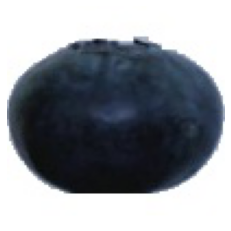

In [17]:
#Displaying the selected image

img = load_img("/content/dataset/fruits-360_dataset/fruits-360/Test/Blueberry/118_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Loading the image 
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image
image = load('/content/dataset/fruits-360_dataset/fruits-360/Test/Blueberry/118_100.jpg')
#/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Test/Blueberry

In [33]:
#Predicting the class
prediction = (np.argmax(model.predict(image), axis=-1))
labels=test_generator.class_indices
key_list = list(labels.keys())
val_list = list(labels.values())
pos= val_list.index(prediction)
print(key_list[pos])

Blueberry


In [19]:
#Printing class dictionary
print(test_generator.class_indices)

{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Corn': 35, 'Corn Husk': 36, 'Cucumber Ripe': 37, 'Cucumber Ripe 2': 38, 'Dates': 39, 'Eggplant': 40, 'Fig': 41, 'Ginger Root': 42, 'Granadilla': 43, 'Grape Blue': 44, 'Grape Pink': 45, 'Grape White': 46, 'Grape White 2': 47, 'Grape White 3': 48, 'Grape White 4': 49, 'Grapefruit Pink': 50, 'Grapefrui

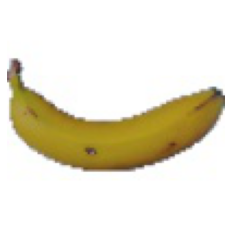

In [20]:
#Displaying the selected image
img2 = load_img("/content/dataset/fruits-360_dataset/fruits-360/Test/Banana/100_100.jpg", target_size=(100,100))
plt.imshow(img2)
plt.axis("off")
plt.show()
#Loading the image 
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image
image2 = load('/content/dataset/fruits-360_dataset/fruits-360/Test/Banana/100_100.jpg')
#/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Test/Blueberry

In [34]:
#Predicting the class
prediction = (np.argmax(model.predict(image2), axis=-1))
pos= val_list.index(prediction)
print(key_list[pos])

Banana


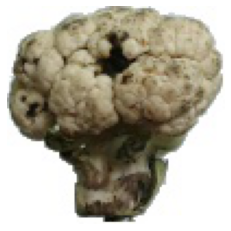

In [23]:
#Displaying the selected image

img3 = load_img("/content/dataset/fruits-360_dataset/fruits-360/Test/Cauliflower/10_100.jpg", target_size=(100,100))
plt.imshow(img3)
plt.axis("off")
plt.show()
#Loading the image 
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image
image3 = load("/content/dataset/fruits-360_dataset/fruits-360/Test/Cauliflower/10_100.jpg")
#/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Test/Blueberry

In [35]:
#Predicting the class
prediction = (np.argmax(model.predict(image3), axis=-1))
pos= val_list.index(prediction)
print(key_list[pos])

Cauliflower


In [25]:
#Printing class dictionary
print(test_generator.class_indices)

{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Corn': 35, 'Corn Husk': 36, 'Cucumber Ripe': 37, 'Cucumber Ripe 2': 38, 'Dates': 39, 'Eggplant': 40, 'Fig': 41, 'Ginger Root': 42, 'Granadilla': 43, 'Grape Blue': 44, 'Grape Pink': 45, 'Grape White': 46, 'Grape White 2': 47, 'Grape White 3': 48, 'Grape White 4': 49, 'Grapefruit Pink': 50, 'Grapefrui

355/355 - 14s - loss: 0.1170 - accuracy: 0.9656 - 14s/epoch - 39ms/step


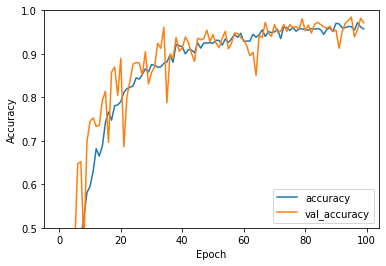

In [26]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_generator, verbose=2)

In [27]:
model.save('model.h5')

In [28]:
model1=tf.keras.models.load_model('model.h5')

In [29]:
prediction = (np.argmax(model1.predict(image3), axis=-1))
print(prediction)

[25]


In [30]:
image3.shape

(1, 100, 100, 3)